AttributeError: module 'matplotlib.pyplot' has no attribute 'plot_surface'

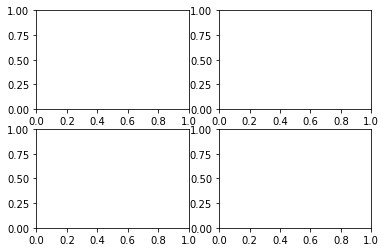

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp

x1 = np.linspace(-5, 5, 10)
y1 = np.linspace(-5, 5, 20)

def g(x,y):
    return 3*x**2-x*y+2*y**2+4*x+8*y+1

x,y = np.meshgrid(x1,y1)
x_,y_ = np.mgrid[-5:5:0.1, -5:5:0.1]
xx, yy = np.mgrid[0:1:0.001, 0:1:0.001]

fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.plot_surface(x_,y_,g(x_,y_))
pcmesh = ax2.pcolormesh(x_,y_,g(x_,y_))
fig.colorbar(pcmesh)
contour = ax2.contour(x_,y_,g(x_,y_), 10, colors='black')
ax2.clabel(contour, colors='black')

contour_ = ax3.contour(x_,y_,g(x_,y_), 10)
ax3.clabel(contour_, colors='black')
       
n = 10000
h = 1/n

gg = np.array([(g(x+h,y)-g(x-h,y))/(2*h),(g(x,y+h)-g(x,y-h))/(2*h)]);gg

modulus = np.sqrt((gg[0]**2)+(gg[1]**2))
ax3.quiver(x,y,gg[0],gg[1])
ax4.quiver(x,y,gg[0]/modulus,gg[1]/modulus)
ax4.contour(x_,y_,g(x_,y_),10)

ax1.set_title("g(x,y) = 3x^2-xy+2y^2+4x+8y+1")
ax2.set_title("colormesh")
ax3.set_title("Gradient Vector Field")
ax4.set_title("Direction of Gradient")

def myf(t,u):
    h = 0.0000001
    gg = np.array([(-g((u[0])+h,(u[1]))+g((u[0])-h,(u[1])))/(2*h),
                   (-g((u[0]),(u[1])+h)+g((u[0]),(u[1])-h))/(2*h)])
    F = np.zeros_like(u)
    F[0] = float(gg[0])
    F[1] = float(gg[1])
    return F

x,y = np.mgrid[-5:5:0.01, -10:10:0.01]

u = [-2.0,2.0]
u_ = [3.0,2.0]
u__ = [-4.0, -4.0]

tspan = [0, 5]

solution_g1 = solve_ivp(myf, tspan, u, method="RK45", rtol=10**(-5))
solution_g2 = solve_ivp(myf, tspan, u_, method='RK45', rtol=10**(-5))
solution_g3 = solve_ivp(myf, tspan, u__, method='RK45', rtol=10**(-5))

ax4.plot(solution_g1.y[0,::],solution_g1.y[1,::])
ax4.plot(solution_g2.y[0,::],solution_g2.y[1,::])
ax4.plot(solution_g3.y[0,::],solution_g3.y[1,::])

op = {'arrowstyle' : '->'}
ax4.annotate('(-2,2)', xy = (-2,2), xytext = (-3,3), arrowprops = op)
ax4.annotate('(3,2)', xy = (3,2), xytext = (4,3), arrowprops = op)
ax4.annotate('(-4,-4)', xy = (-4,-4), xytext = (-5,-5), arrowprops = op)

solution_g1.y[:,-1]
solution_g2.y[:,-1]
solution_g3.y[:,-1]


x1 = np.linspace(-4, 4, 10)
y1 = np.linspace(-4, 4, 20)

def g(x,y):
    return (np.sin(0.5*(x**2)-0.25*(y**2)+3))*np.cos(2*x+1-np.exp(y))

x,y = np.meshgrid(x1,y1)
x_,y_ = np.mgrid[-4:4:0.1, -4:4:0.1]

fig = plt.figure()
ax1 = fig.add_subplot(2,2,1, projection='3d')
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.plot_surface(x_,y_,g(x_,y_))
pcmesh = ax2.pcolormesh(x_,y_,g(x_,y_))
fig.colorbar(pcmesh)
contour = ax2.contour(x_,y_,g(x_,y_), 10, colors='black')

contour_ = ax3.contour(x_,y_,g(x_,y_), 10)
       
n = 10000
h = 1/n

gg = np.array([(g(x+h,y)-g(x-h,y))/(2*h),(g(x,y+h)-g(x,y-h))/(2*h)]);gg

modulus = np.sqrt((gg[0]**2)+(gg[1]**2))
ax3.quiver(x,y,gg[0],gg[1])
ax4.quiver(x,y,gg[0]/modulus,gg[1]/modulus)
ax4.contour(x_,y_,g(x_,y_),10)

ax2.set_title("colormesh")
ax3.set_title("Gradient Vector Field")
ax4.set_title("Direction of Gradient")

def myf(t,u):
    h = 0.0000001
    gg = np.array([(-g((u[0])+h,(u[1]))+g((u[0])-h,(u[1])))/(2*h),
                   (-g((u[0]),(u[1])+h)+g((u[0]),(u[1])-h))/(2*h)])
    F = np.zeros_like(u)
    F[0] = float(gg[0])
    F[1] = float(gg[1])
    return F

u = [-1.0,1.0]
u_ = [2.0,2.0]
u__ = [-1.5, -1.5]

tspan = [0, 100]

solution_g1 = solve_ivp(myf, tspan, u, method="RK45", rtol=10**(-5))
solution_g2 = solve_ivp(myf, tspan, u_, method='RK45', rtol=10**(-5))
solution_g3 = solve_ivp(myf, tspan, u__, method='RK45', rtol=10**(-5))

ax4.plot(solution_g1.y[0,::],solution_g1.y[1,::], color='red')
ax4.plot(solution_g2.y[0,::],solution_g2.y[1,::], color='red')
ax4.plot(solution_g3.y[0,::],solution_g3.y[1,::], color='red')

ax2.plot(solution_g1.y[0,::],solution_g1.y[1,::], color='red')
ax2.plot(solution_g2.y[0,::],solution_g2.y[1,::], color='red')
ax2.plot(solution_g3.y[0,::],solution_g3.y[1,::], color='red')

op = {'arrowstyle' : '->'}
ax4.annotate('(-2,2)', xy = (-1,1), xytext = (-2,2), arrowprops = op, color = 'red')
ax4.annotate('(3,2)', xy = (2,2), xytext = (3,3), arrowprops = op, color = 'red')
ax4.annotate('(-1.5,-1.5)', xy = (-1.5,-1.5), xytext = (-2.5,-2.5), arrowprops = op, color = 'red')

ax2.annotate('(-2,2)', xy = (-1,1), xytext = (-2,2), arrowprops = op, color = 'red')
ax2.annotate('(3,2)', xy = (2,2), xytext = (3,3), arrowprops = op, color = 'red')
ax2.annotate('(-1.5,-1.5)', xy = (-1.5,-1.5), xytext = (-2.5,-2.5), arrowprops = op, color = 'red')

solution_g1.y[:,-1]
solution_g2.y[:,-1]
solution_g3.y[:,-1]
fig.show()

In [18]:
x_.shape

(80, 80)

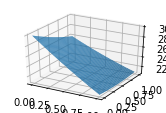

In [22]:
def f(x,y):
    return x**2+y**2+4*x*y-10*x-5*y+30

fig2 = plt.figure()
ax1 = fig2.add_subplot(2,2,1, projection='3d')

ax1.plot_surface(xx,yy,f(xx,yy))
